# Empalme con la clase anterior y continuacion con RNN
## Motivacion para las redes recursivas (recurrentes).

Vamos a construir la "stay-leave" matrix
Esta esta dada por


\begin{eqnarray}
\text{stay-leave} = \begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
-- & --  \\
0 & 1 \\
0 & 1 \\
0 & 1
\end{pmatrix}
\end{eqnarray}

Veamos como esta matriz opera en quedarse (stay) or irse (leave).


\begin{eqnarray}
\text{ ( stay-leave)(stay) }=
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
-- & --  \\
0 & 1 \\
0 & 1 \\
0 & 1
\end{pmatrix}
\binom{1}{0}
= \begin{pmatrix}
1 \\ 1 \\ 1 \\ -- \\
0 \\ 0 \\ 0
\end{pmatrix}
\end{eqnarray}




\begin{eqnarray}
\text{ ( stay-leave)(stay) }=
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
-- & --  \\
0 & 1 \\
0 & 1 \\
0 & 1
\end{pmatrix}
\binom{0}{1}
= \begin{pmatrix}
0 \\ 0 \\ 0 \\ -- \\
1 \\ 1 \\ 1
\end{pmatrix}
\end{eqnarray}


Para crear el modelo, nos apoyamos en un ejemplo simple. El mensajero esta en la ciudad de Cali $C$ y existen dos posibilidades

* se queda en Cali $C$
* avanza a Armenida $A$.

Inicialmente asumamos que se queda en Cali $C$.


Consideremos los siguientes pasos en la construccion del modelo.

1. El resultado de $MC$  es

\begin{eqnarray}
MC =
\begin{pmatrix}
1 & 0 & 0  \\
0 & 1 & 0  \\
0 & 0 & 1  \\
-- & -- & -- \\
0 & 0 & 1  \\
1 & 0 & 0  \\
0 & 1 & 0  \\
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 0 \\ 1  \\ -- \\ 1 \\ 0 \\ 0
\end{pmatrix}
\end{eqnarray}

y el resultado de "ir" o "quedarse es: asumiendo que se queda es:
\begin{eqnarray}
\text{ ( stay-leave)(stay) }=
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
-- & --  \\
0 & 1 \\
0 & 1 \\
0 & 1
\end{pmatrix}
\binom{1}{0}
= \begin{pmatrix}
1 \\ 1 \\ 1 \\ -- \\
0 \\ 0 \\ 0
\end{pmatrix}
\end{eqnarray}

2. El segundo paso es la suma de las dos matrices $MC$ y $\text{(stay-leave)(stay)}$.







$$  MC + \text{(stay-leave)(stay)}  =
\begin{pmatrix}
0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0
\end{pmatrix} +
\begin{pmatrix}
1 \\ 1 \\1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 1 \\2 \\ 1 \\ 0 \\ 0
\end{pmatrix}
.$$

3.0 El siguiente paso es un filtro no lineal. Que hace el filtro?
Al maximo de los valores resultantes se le asigna "1" y a los demas 0.
Es decir, el produce

$$I= \begin{pmatrix}
0 \\ 0 \\1 \\ 0 \\ 0 \\ 0
\end{pmatrix}. $$

4.0 El paso final es multiplicar este resultado por la matriz

$$ Q =  \begin{pmatrix}
1 & 0 & 0  & 1 & 0 & 0 \\
0 & 1 & 0  & 0 & 1 & 0 \\
0 & 0 & 1  & 0 & 0 & 1
\end{pmatrix}. $$
De forma que

$$ QI =  \begin{pmatrix}
1 & 0 & 0  & 1 & 0 & 0 \\
0 & 1 & 0  & 0 & 1 & 0 \\
0 & 0 & 1  & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\1 \\ 0 \\ 0 \\ 0
\end{pmatrix} =
\begin{pmatrix} 0 \\ 0 \\ 1  \end{pmatrix} $$

Este es resultado que corresponde a $C$.

La matriz $Q$ hace el siguiente proceso.

$$  \begin{pmatrix}
1 & 0 & 0  & 1 & 0 & 0 \\
0 & 1 & 0  & 0 & 1 & 0 \\
0 & 0 & 1  & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ x_3 \\ y_1 \\ y_2 \\ y_3
\end{pmatrix} =
\begin{pmatrix} x_1 + y_1  \\ x_2 + y_2 \\ x_3 + y_3  \end{pmatrix} $$







Graficamente:

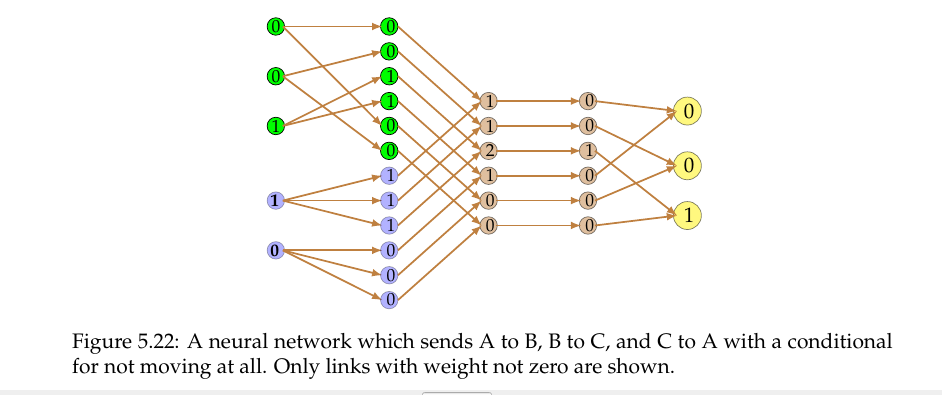


La grafica anterior no tiene recursividad. No itera. Llega al final a ahi para. Entonces, la grafica para poder que el proceso continue es:

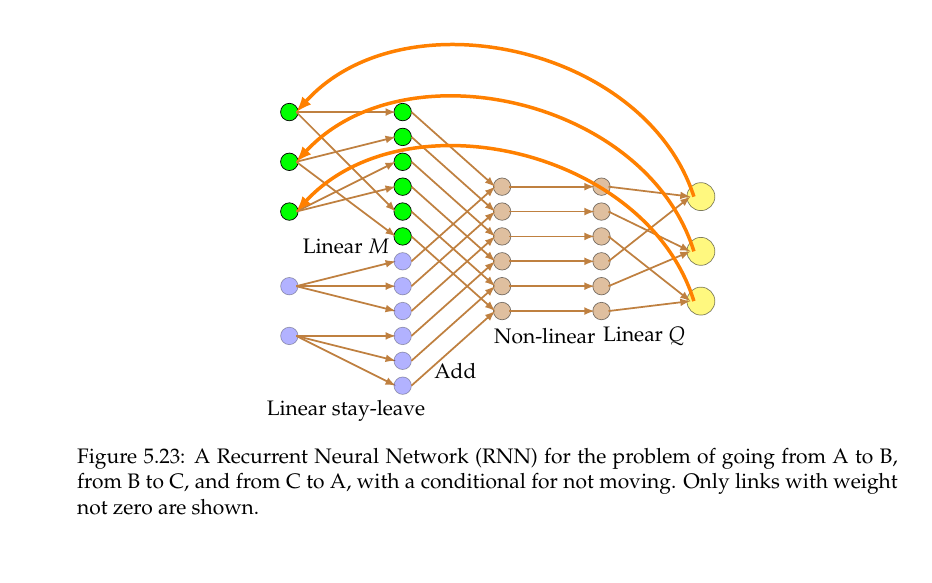

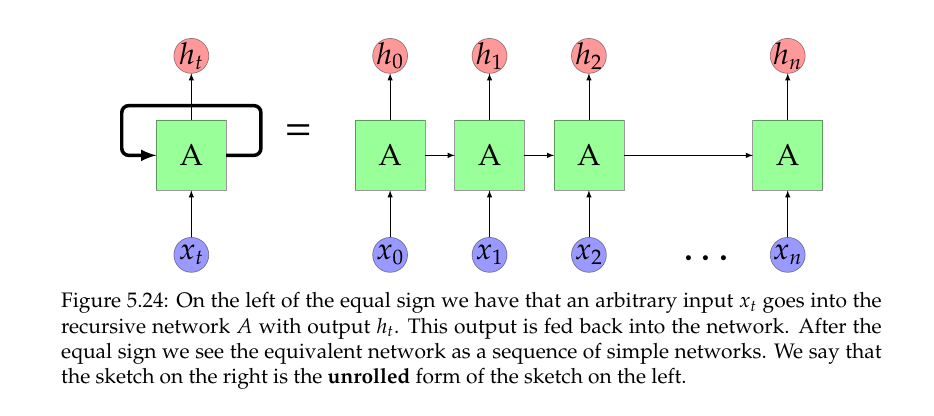



## Matematica de las redes recursivas.

$$ h_t = f_{\Theta}(h_{t-1}, x_t) .$$
Un pseudocodigo para esto en python

```
h=0
for i in range(n):
    x_i = input_data_i
    h = f(np.dot(Theta_x, x_i) + np.dot(Theta_h, h_i)
```

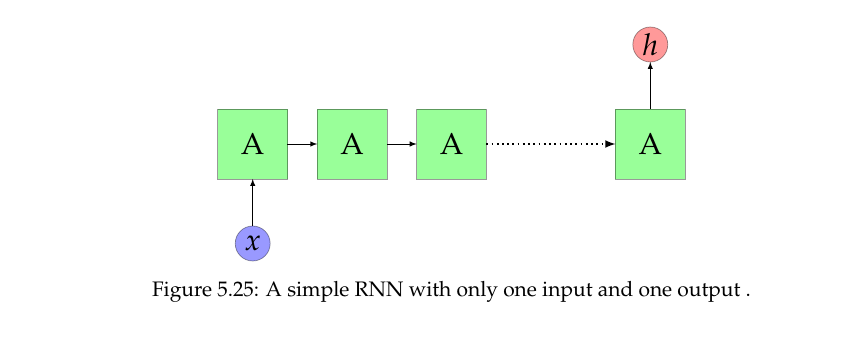

No necesariamente en cada recursion debe entrar un vector de datos $x_t$. Por ejemplo

Un ejemplo mas complicado donde hay un "stack" (pila) de capas es:

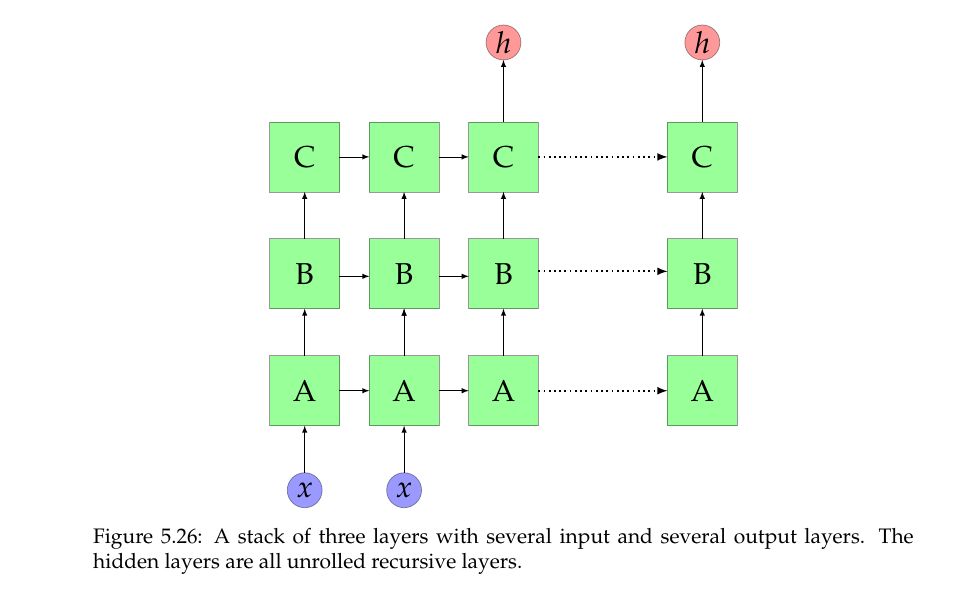

De acuerdo a la arquitectura hay una clasificacion:

* Varias entradas, varias salidas en una uno-a-uno arquitectura como en la Figura 5.2.4. **many--to-many** RNN

* Varias entradas, varias salidas con pilas de capas como las de la Figura 5.26. **many--to--many** RNN

* Una entrada y una salida solo, como en la Figura 5.25. Visto de esta forma se comporta como un MLP. **one-to-one** RNN

* Una entrada y varias salidas. **one-to-many** RNN (no hay figura)

* Varias entradas y una salida. **many--to-one** (RNN)

## Gradiente de RNNs

### Estudio de calculo tensorial. Derivadas de funciones tensoriales.

Se asume que el lector esta familiarizado con las derivadas parciales de campos escalares.  

O sea, asuma $f: A \subset \mathbb{R}^n \to \mathbb{R}  $
donde $x=(x_1, x_2, \cdots, x_n)$ . La derivada parcial a lo largo de la direccion $x_i$, esta data por
\begin{eqnarray*}
  \frac{\partial f}{\partial x_i} = \lim_{h \to 0}
  \frac{f(x_1, x_2, \cdots, x_{i-1}, x_i+h, x_{i+1}, \cdots x_n) - f(x_1, x_2, \cdots, x_{i-1} ,
  x_i, x_{i+1}, \cdots, x_n)}{h},
\end{eqnarray*}




Asumismos que este limite siempre existe. Si existe para cada derivada parcial entonces existe el **gradiente** de $f$. Esde lo definimos (notacion)


$$ \nabla_x f \equiv  \frac{\partial f}{\partial x} .$$
abusando de la notacion. Donde

$$ \frac{\partial f}{\partial x} = \left ( \frac{\partial f}{\partial x_i} \right ) .$$ Es un vector (rango de orden 1.

Prodia pasar que $f$ es un vector $f=(f_1, f_2, \cdots, f_m)$.
(campo vectorial), en este caso definimos la matrix Jacobiana (**Jacobian Matrix**).


$$ (J)_{ij} = \frac{\partial f_i}{\partial x_j}  .$$

Nosotros, en nuestro abuso de notacion escribimos
$$ J = \frac{\partial f}{\partial x}. $$
Si $m=n=1$ tenemos la clasica derivda  $df/dx=f'(x)$, por ejemplo si $f(x)=x^2$, $df/dx = 2x$.

En nuestra "abusiva" notacion escribimos


$$ \nabla_x f = \frac{\partial f}{\partial x}.$$

Podria pasar que $f(x_1, x_2,  \cdots, x_p; \theta_1, \theta_q, \cdots, \theta_q)$. En este caso escribimos


\begin{eqnarray}
\nabla_x f =
\begin{pmatrix}
\frac{\partial f_1}{\partial x_1} &   \frac{\partial f_2}{\partial x_1} &   \cdots &  \frac{\partial f_m}{\partial x_1}   \\
\frac{\partial f_1}{\partial x_2} &   \frac{\partial f_2}{\partial x_2} &   \cdots &  \frac{\partial f_m}{\partial x_2}  \\
\vdots & \vdots & \ddots & \vdots  \\
\frac{\partial f_1}{\partial x_p} &   \frac{\partial f_2}{\partial x_p} &   \cdots &  \frac{\partial f_m}{\partial x_p}  
\end{pmatrix}
\end{eqnarray}

De igual forma, ahora con respecto a $\theta$,

\begin{eqnarray}
\nabla_{\theta} f =
\begin{pmatrix}
\frac{\partial f_1}{\partial \theta_1} &   \frac{\partial f_2}{\partial \theta_1} &   \cdots &  \frac{\partial f_m}{\partial \theta_1}   \\
\frac{\partial f_1}{\partial \theta_2} &   \frac{\partial f_2}{\partial \theta_2} &   \cdots &  \frac{\partial f_m}{\partial \theta_2}  \\
\vdots & \vdots & \ddots & \vdots  \\
\frac{\partial f_1}{\partial \theta_q} &   \frac{\partial f_2}{\partial \theta_q} &   \cdots &  \frac{\partial f_m}{\partial \theta_q}  
\end{pmatrix}
\end{eqnarray}

Podria pasar que $\theta$ es una matriz (tensor) en $\Theta \in \mathbb{R}^{m \times n}$ y que $f$ sea escalar.
Entonces escribimos

\begin{eqnarray}
\nabla_{\Theta} f = \frac{\partial f}{\partial \Theta}
=
\begin{pmatrix}
\frac{\partial f}{\partial \Theta_{11}} &   \frac{\partial f}{\partial \theta_{12}} &   \cdots &  \frac{\partial f}{\partial \Theta_{1n}}   \\
\frac{\partial f}{\partial \Theta_{21}} &   \frac{\partial f}{\partial \Theta_{22}} &   \cdots &  \frac{\partial f}{\partial \Theta_{2n}}  \\
\vdots & \vdots & \ddots & \vdots  \\
\frac{\partial f}{\partial \Theta_{m1}} &   \frac{\partial f}{\partial \Theta_{m2}} &   \cdots &  \frac{\partial f}{\partial \Theta_{mn}}  
\end{pmatrix}
\end{eqnarray}

# Proxma clase generalizacion a tensores de cualquier rango.